In [21]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('D:\\hw_data\\churn_prediction_data\\train.csv')

In [22]:
def cretate(data_f, the_f_list, feature_list, features_list):
    the_data = data_f
    l = len(the_f_list)
    for i in range(l):
        the_data = the_data[the_data[feature_list[i]] == the_f_list[i]]
    length = len(the_data)
    if(length == 0):
        ans_list = [[the_f_list, length, "N/A", "N/A"]]
    else:
        ans_list = [[the_f_list, length, len(the_data[the_data["Exited"] == 0])/length
                     , len(the_data[the_data["Exited"] == 1])/length]]        
    if(len(the_f_list) < len(feature_list)):
        for feature in features_list[l]:
            ans_list += cretate(data_f,the_f_list + [feature] , feature_list, features_list)
    return ans_list

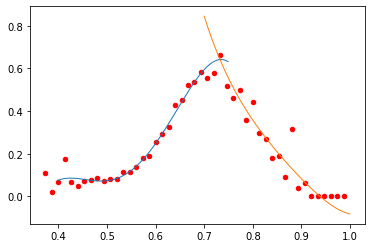

In [23]:
data_list = cretate(data, [], ["Age"], [list(range(28,76))])
data_list[0][0] = ["total"]
x = pd.DataFrame(data_list, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])
x = x[x["number"] > 0]
x = x.iloc[1:48]
#這是原始的退出機率散佈圖(針對年齡)
plt.scatter(np.array(list(range(28,75)))/75,x["ratio of exit"],s=20, color = "red")
##二次回歸的準備
from scipy.optimize import curve_fit
def sigmoid(x, Beta_1, Beta_2, Beta_3, Beta_4, Beta_5):
    y = Beta_1 + Beta_2*x + Beta_3*x*x+ Beta_4*x*x*x + Beta_5*x*x*x*x
    return y
#這是28至55歲顧客的退出機率的二次回歸
x = np.array(data["Age"][data["Age"] <= 55])
y = np.array(data["Exited"][data["Age"] <= 55])
X = x/75
popt, pcov = curve_fit(sigmoid, X, y)
x = np.array(list(range(400,750)))/1000
plt.plot(x ,sigmoid(x, *popt) , linewidth=1, label='fit')
#這是55至75歲顧客的退出機率二次回歸
x2 = np.array(data["Age"][data["Age"] >= 55])
y2 = np.array(data["Exited"][data["Age"] >= 55])
X2 = x2/75
popt2, pcov2 = curve_fit(sigmoid, X2, y2)
x = np.array(list(range(700,1000)))/1000
plt.plot(x ,sigmoid(x, *popt2) , linewidth=1, label='fit')

In [24]:
title_list = ["NumOfProducts", "Geography", "IsActiveMember", "Gender"]
feature_list = [[1, 2, 3], ["Spain","Germany","France"], [0, 1], ["Female", "Male"]]
y = []
for i in range(4):
    y += cretate(data, [], [title_list[i]], [feature_list[i]])
x = pd.DataFrame(y, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])
x = x[x["number"] != 8000]
NumOfProducts_dict = {1:x.iloc[0]["ratio of exit"],2:x.iloc[1]["ratio of exit"],3:x.iloc[2]["ratio of exit"]}
print(NumOfProducts_dict)
Geography_dict = {"Spain":x.iloc[3]["ratio of exit"],"Germany":x.iloc[4]["ratio of exit"],"France":x.iloc[5]["ratio of exit"]}
print(Geography_dict)
IsActiveMember_dict = {0:x.iloc[6]["ratio of exit"],1:x.iloc[7]["ratio of exit"]}
print(IsActiveMember_dict)
Gender_dict = {"Female":x.iloc[8]["ratio of exit"],"Male":x.iloc[9]["ratio of exit"]}
print(Gender_dict)
x = data[data["CreditScore"] <= 480]
low_CreditScore = len(x[x["Exited"]==1])/len(x)
print(low_CreditScore)
x = data[data["Balance"] >= 0]
x = x[x["Balance"] <= 70000]
y = data[data["Balance"] >= 70000]
y = y[y["Balance"] <= 200000]
Balance_dict = {"low":(len(x[x["Exited"]==1])/len(x)), "high":(len(y[y["Exited"]==1])/len(y))}
print(Balance_dict)
exit = len(data[data["Exited"]==1])/len(data)
non_exit = len(data[data["Exited"]==0])/len(data)

{1: 0.2795246348105967, 2: 0.07438463619150662, 3: 0.8325581395348837}
{'Spain': 0.17105263157894737, 'Germany': 0.321605550049554, 'France': 0.16100848726909636}
{0: 0.2701164294954722, 1: 0.1422007255139057}
{'Female': 0.25020666850372003, 'Male': 0.1656371539693434}
0.9444444444444444
{'low': 0.13716814159292035, 'high': 0.24278941129988146}


In [25]:
Age = np.array(data["Age"])
result1 = sigmoid(Age/75, *popt)
result1[Age > 55] = 0
result2 = sigmoid(Age/75, *popt2)
result2[Age <= 55] = 0
result = result2 + result1
exit_prob = result + 0
non_exit_prob = 1 - result
NumOfProducts = np.array(data["NumOfProducts"])
result = exit_prob + 0
result[NumOfProducts == 1] = NumOfProducts_dict[1]
result[NumOfProducts == 2] = NumOfProducts_dict[2]
result[NumOfProducts == 3] = NumOfProducts_dict[3]
exit_prob *= result/exit 
non_exit_prob *= (1 - result)/non_exit
Geography = np.array(data["Geography"])
result = exit_prob + 0
result[Geography == "Spain"] = Geography_dict["Spain"]
result[Geography == "Germany"] = Geography_dict["Germany"]
result[Geography == "France"] = Geography_dict["France"]
exit_prob *= result/exit 
non_exit_prob *= (1 - result)/non_exit
IsActiveMember = np.array(data["IsActiveMember"])
result = exit_prob + 0
result[IsActiveMember == 0] = IsActiveMember_dict[0]
result[IsActiveMember == 1] = IsActiveMember_dict[1]
exit_prob *= result/exit 
non_exit_prob *= (1 - result)/non_exit
Gender = np.array(data["Gender"])
result = exit_prob + 0
result[Gender == 'Female'] = Gender_dict['Female']
result[Gender == 'Male'] = Gender_dict['Male']
exit_prob *= result/exit 
non_exit_prob *= (1 - result)/non_exit
CreditScore = np.array(data["CreditScore"])
result = exit_prob + 0
result[CreditScore < 480 ] = low_CreditScore
exit_prob *= result/exit 
non_exit_prob *= (1 - result)/non_exit
Balance = np.array(data["Balance"])
result = exit_prob + 0
result[Balance < 70000 ] = Balance_dict["low"]
result[Balance >= 70000 ] = Balance_dict["high"]
exit_prob *= result/exit 
non_exit_prob *= (1 - result)/non_exit
predict = exit_prob - non_exit_prob
predict[predict <= 0] = 0
predict[predict > 0] = 1

In [26]:
answer = np.array(data["Exited"])
test = (predict + answer - 1)**2
print(test.mean())
print(sum(predict * answer)/sum(predict))
print(predict.mean())

0.8395
0.6071428571428571
0.203


In [27]:
data = pd.read_csv('D:\\hw_data\\churn_prediction_data\\test.csv')
data

RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
0          2209    15623595        Scott          726    France  Female   39   
1          9924    15740283     Yegorova          661    France    Male   42   
2          4617    15802368          Tan          545    France    Male   34   
3          6077    15615322  Anayochukwu          731     Spain  Female   42   
4          9240    15766374       Glover          533    France  Female   50   
...         ...         ...          ...          ...       ...     ...  ...   
1995       7872    15617348       Taylor          628    France    Male   35   
1996       4257    15642785     Tokareva          639   Germany    Male   41   
1997       2273    15766575     Trevisan          548    France  Female   46   
1998        315    15610271      Dickson          602     Spain  Female   44   
1999       3628    15763895           He          615   Germany  Female   32   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          3   62397.41              1          0               0   
1          3  130339.64              1          1               0   
2          6   62397.41              2          1               1   
3          3   86717.08              1          1               0   
4          6   62397.41              1          1               1   
...      ...        ...            ...        ...             ...   
1995       6   62397.41              2          1               1   
1996       5   98154.30              2          1               0   
1997       3  119078.34              2          1               1   
1998       7   62397.41              2          1               1   
1999       5  105570.37              1          1               0   

      EstimatedSalary  
0           106139.31  
1           125776.38  
2            78372.28  
3           136026.27  
4           135205.58  
...               ...  
1995         96201.09  
1996        109531.64  
1997        116725.67  
1998        128135.95  
1999        104140.30  

[2000 rows x 13 columns]

In [28]:
Age = np.array(data["Age"])
result1 = sigmoid(Age/75, *popt)
result1[Age > 55] = 0
result2 = sigmoid(Age/75, *popt2)
result2[Age <= 55] = 0
result = result2 + result1
exit_prob = result + 0
non_exit_prob = 1 - result
NumOfProducts = np.array(data["NumOfProducts"])
result = exit_prob + 0
result[NumOfProducts == 1] = NumOfProducts_dict[1]
result[NumOfProducts == 2] = NumOfProducts_dict[2]
result[NumOfProducts == 3] = NumOfProducts_dict[3]
exit_prob *= result/exit 
non_exit_prob *= (1 - result)/non_exit
Geography = np.array(data["Geography"])
result = exit_prob + 0
result[Geography == "Spain"] = Geography_dict["Spain"]
result[Geography == "Germany"] = Geography_dict["Germany"]
result[Geography == "France"] = Geography_dict["France"]
exit_prob *= result/exit 
non_exit_prob *= (1 - result)/non_exit
IsActiveMember = np.array(data["IsActiveMember"])
result = exit_prob + 0
result[IsActiveMember == 0] = IsActiveMember_dict[0]
result[IsActiveMember == 1] = IsActiveMember_dict[1]
exit_prob *= result/exit 
non_exit_prob *= (1 - result)/non_exit
Gender = np.array(data["Gender"])
result = exit_prob + 0
result[Gender == 'Female'] = Gender_dict['Female']
result[Gender == 'Male'] = Gender_dict['Male']
exit_prob *= result/exit 
non_exit_prob *= (1 - result)/non_exit
CreditScore = np.array(data["CreditScore"])
result = exit_prob + 0
result[CreditScore < 480 ] = low_CreditScore
exit_prob *= result/exit 
non_exit_prob *= (1 - result)/non_exit
Balance = np.array(data["Balance"])
result = exit_prob + 0
result[Balance < 70000 ] = Balance_dict["low"]
result[Balance >= 70000 ] = Balance_dict["high"]
exit_prob *= result/exit 
non_exit_prob *= (1 - result)/non_exit
predict = exit_prob - non_exit_prob
predict[predict <= 0] = 0
predict[predict > 0] = 1
data["predict"] = predict
data

RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
0          2209    15623595        Scott          726    France  Female   39   
1          9924    15740283     Yegorova          661    France    Male   42   
2          4617    15802368          Tan          545    France    Male   34   
3          6077    15615322  Anayochukwu          731     Spain  Female   42   
4          9240    15766374       Glover          533    France  Female   50   
...         ...         ...          ...          ...       ...     ...  ...   
1995       7872    15617348       Taylor          628    France    Male   35   
1996       4257    15642785     Tokareva          639   Germany    Male   41   
1997       2273    15766575     Trevisan          548    France  Female   46   
1998        315    15610271      Dickson          602     Spain  Female   44   
1999       3628    15763895           He          615   Germany  Female   32   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          3   62397.41              1          0               0   
1          3  130339.64              1          1               0   
2          6   62397.41              2          1               1   
3          3   86717.08              1          1               0   
4          6   62397.41              1          1               1   
...      ...        ...            ...        ...             ...   
1995       6   62397.41              2          1               1   
1996       5   98154.30              2          1               0   
1997       3  119078.34              2          1               1   
1998       7   62397.41              2          1               1   
1999       5  105570.37              1          1               0   

      EstimatedSalary  predict  
0           106139.31      0.0  
1           125776.38      0.0  
2            78372.28      0.0  
3           136026.27      0.0  
4           135205.58      1.0  
...               ...      ...  
1995         96201.09      0.0  
1996        109531.64      0.0  
1997        116725.67      0.0  
1998        128135.95      0.0  
1999        104140.30      1.0  

[2000 rows x 14 columns]

In [29]:
print(predict.mean())

0.199


In [30]:
Exited = data["predict"]
RowNumber = data["RowNumber"]
upload = np.array([RowNumber,Exited])
upload = upload.transpose()
upload = list(upload)
upload
x = pd.DataFrame(upload, columns = ["RowNumber", "Exited"])
x.to_csv('first_try_2.csv')